In [2]:
from pathlib import Path
import time

import requests
import pandas as pd
#import utils

# linear algebra, probability
import numpy as np

# data manipulation
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## interactive visualization library
# import plotly.offline as py
# py.init_notebook_mode()
# import plotly.graph_objs as go
# import plotly.figure_factory as ff
# import plotly.express as px

# utils.fetch_and_cache_gdrive('18X6IPDtGIqq_PUH9praEPh37BuStzVwu', 'anxiety_data', data_dir="data", force=False)
# utils.fetch_and_cache_gdrive('1CO6rxLRM6g0wcQduuG97I71pSzVX6Nat', 'mental_data', data_dir="data", force=False)

df_symptoms_anx_depr = pd.read_csv('./Indicators_of_Anxiety_or_Depression_Based_on_Reported_Frequency_of_Symptoms_During_Last_7_Days.csv')
df_healthcare = pd.read_csv('./nchs_covid_mental_health_care.csv')
df_insurance = pd.read_csv('./nchs_covid_health_insurance_coverage.csv')
df_access = pd.read_csv('./nchs_covid_reduced_access_to_health_care.csv')
df_tele = pd.read_csv('./Telemedicine_Use_in_the_Last_4_Weeks.csv')

### Data Sampling and Collection
The data was collected by the Centers for Disease Control and Prevention and reported by the National Center for Health Statistics. They collected the data through an internet questionnaire, and participants were invited through email and text message. The sample frame was the Census Bureau Master Address File Data. 

There was some potential bias introduced in the sampling process. Some examples of possible errors in the data are: sampling error, nonresponse error (response rate of about 5.8\%) is lower than most federally sponsored surveys), measurement error (misunderstandings or incorrect information of the participant), processing error (data can be incorrectly recorded or get lost) etc.

### Contextualizing the Data & Data Cleaning
Let's check out the data and infer its structure.

In [3]:
df_symptoms_anx_depr.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.2,21.5,25.0,21.5 - 25.0,NaN


In [4]:
df_healthcare.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3,NaN,NaN
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2,NaN,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3,NaN,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2,NaN,NaN


In [5]:
df_insurance.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag
0,Uninsured at the Time of Interview,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,12.6,12.1,13.3,12.1 - 13.3,NaN,NaN
1,Uninsured at the Time of Interview,By Age,United States,18 - 24 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,17.7,14.2,21.6,14.2 - 21.6,NaN,NaN
2,Uninsured at the Time of Interview,By Age,United States,25 - 34 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,16.8,15.6,18.1,15.6 - 18.1,NaN,NaN
3,Uninsured at the Time of Interview,By Age,United States,35 - 44 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,12.1,10.7,13.6,10.7 - 13.6,NaN,NaN
4,Uninsured at the Time of Interview,By Age,United States,45 - 64 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,9.5,8.8,10.2,8.8 - 10.2,NaN,NaN


In [6]:
df_access.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,"Delayed Medical Care, Last 4 Weeks",National Estimate,United States,United States,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,38.7,38.1,39.4,38.1 - 39.4,NaN
1,"Delayed Medical Care, Last 4 Weeks",By Age,United States,18 - 29 years,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,34.8,32.5,37.2,32.5 - 37.2,NaN
2,"Delayed Medical Care, Last 4 Weeks",By Age,United States,30 - 39 years,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,37.3,35.6,39.0,35.6 - 39.0,NaN
3,"Delayed Medical Care, Last 4 Weeks",By Age,United States,40 - 49 years,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,40.3,39.0,41.7,39.0 - 41.7,NaN
4,"Delayed Medical Care, Last 4 Weeks",By Age,United States,50 - 59 years,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,40.7,39.3,42.2,39.3 - 42.2,NaN


In [7]:
df_tele.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag
0,Adults Who Had Appointment with Health Profess...,National Estimate,United States,United States,3.1,28,"Apr 14 - Apr 26, 2021",04/14/2021,04/26/2021,25.7,25.0,26.4,25.0 - 26.4,NaN,NaN
1,Adults Who Had Appointment with Health Profess...,By Age,United States,18 - 29 years,3.1,28,"Apr 14 - Apr 26, 2021",04/14/2021,04/26/2021,21.6,19.2,24.1,19.2 - 24.1,NaN,NaN
2,Adults Who Had Appointment with Health Profess...,By Age,United States,30 - 39 years,3.1,28,"Apr 14 - Apr 26, 2021",04/14/2021,04/26/2021,23.1,21.7,24.5,21.7 - 24.5,NaN,NaN
3,Adults Who Had Appointment with Health Profess...,By Age,United States,40 - 49 years,3.1,28,"Apr 14 - Apr 26, 2021",04/14/2021,04/26/2021,25.7,24.2,27.3,24.2 - 27.3,NaN,NaN
4,Adults Who Had Appointment with Health Profess...,By Age,United States,50 - 59 years,3.1,28,"Apr 14 - Apr 26, 2021",04/14/2021,04/26/2021,26.3,24.6,28.1,24.6 - 28.1,NaN,NaN


The datasets about anxiety and depression symptoms, health insurance coverage and access to health care seem to have a very similar structure. We have to examine wheter there are the same amount of records in each dataset?

In [8]:
print(len(df_symptoms_anx_depr))
print(len(df_healthcare))
print(len(df_insurance))
print(len(df_access))
print(len(df_tele))

11484
9764
9243
7118
3344


They don't have the same amount of records! Let's take a look at the columns in each of the datasets.

In [9]:
print(df_symptoms_anx_depr.columns.values)
print(df_healthcare.columns.values)
print(df_insurance.columns.values)
print(df_access.columns.values)
print(df_tele.columns.values)

['Indicator' 'Group' 'State' 'Subgroup' 'Phase' 'Time Period'
 'Time Period Label' 'Time Period Start Date' 'Time Period End Date'
 'Value' 'Low CI' 'High CI' 'Confidence Interval' 'Quartile Range']
['Indicator' 'Group' 'State' 'Subgroup' 'Phase' 'Time Period'
 'Time Period Label' 'Time Period Start Date' 'Time Period End Date'
 'Value' 'LowCI' 'HighCI' 'Confidence Interval' 'Quartile Range'
 'Suppression Flag']
['Indicator' 'Group' 'State' 'Subgroup' 'Phase' 'Time Period'
 'Time Period Label' 'Time Period Start Date' 'Time Period End Date'
 'Value' 'Low CI' 'High CI' 'Confidence Interval' 'Quartile Range'
 'Suppression Flag']
['Indicator' 'Group' 'State' 'Subgroup' 'Phase' 'Time Period'
 'Time Period Label' 'Time Period Start Date' 'Time Period End Date'
 'Value' 'Low CI' 'High CI' 'Confidence Interval' 'Quartile Range']
['Indicator' 'Group' 'State' 'Subgroup' 'Phase' 'Time Period'
 'Time Period Label' 'Time Period Start Date' 'Time Period End Date'
 'Value' 'Low CI' 'High CI' 'Confid

We see that the symptoms and access to healthcare datasets have the same columns, the mental health care, insurance and telemedicine datasets have one extra column 'Suppression Flag'.

Let's try to contextualize the data and understand the background of the dataset before diving into an analysis. Based on the columns and the values they take, each row seems to represent statistical information for each subgroup and time period about a specific indicator.

In [10]:
print(df_symptoms_anx_depr["Indicator"].unique())
print(df_healthcare["Indicator"].unique())
print(df_insurance["Indicator"].unique())
print(df_access["Indicator"].unique())
print(df_tele["Indicator"].unique())

['Symptoms of Depressive Disorder' 'Symptoms of Anxiety Disorder'
 'Symptoms of Anxiety Disorder or Depressive Disorder']
['Took Prescription Medication for Mental Health, Last 4 Weeks'
 'Received Counseling or Therapy, Last 4 Weeks'
 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks'
 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']
['Uninsured at the Time of Interview' 'Public Health Insurance Coverage'
 'Private Health Insurance Coverage']
['Delayed Medical Care, Last 4 Weeks'
 'Did Not Get Needed Care, Last 4 Weeks'
 'Delayed or Did Not Get Care, Last 4 Weeks']
['Adults Who Had Appointment with Health Professional Over Video or Phone, Last 4 Weeks'
 'Households With Children Where Any Child Had Appointment with Health Professional Over Video or Phone, Last 4 Weeks']


The Indicator column can take three different values: "Symptoms of Anxiety Disorder", "Symptoms of Depressive Disorder" and "Symptoms of Anxiety Disorder or Depressive Disorder".

[TODO: add for other datasets]

Let's take a look at the different groups that are in the datasets.

In [11]:
print(df_symptoms_anx_depr["Group"].unique())
print(df_healthcare["Group"].unique())
print(df_insurance["Group"].unique())
print(df_access["Group"].unique())
print(df_tele["Group"].unique())

['National Estimate' 'By Age' 'By Sex' 'By Race/Hispanic ethnicity'
 'By Education' 'By State' 'By Disability status' 'By Gender identity'
 'By Sexual orientation']
['National Estimate' 'By Age' 'By Sex'
 'By Presence of Symptoms of Anxiety/Depression'
 'By Race/Hispanic ethnicity' 'By Education' 'By State'
 'By Disability status' 'By Gender identity' 'By Sexual orientation']
['National Estimate' 'By Age' 'By Sex' 'By Race/Hispanic ethnicity'
 'By Education' 'By State' 'By Disability status' 'By Gender identity'
 'By Sexual orientation']
['National Estimate' 'By Age' 'By Sex' 'By Race/Hispanic ethnicity'
 'By Education' 'By State' 'By Disability status']
['National Estimate' 'By Age' 'By Sex' 'By Race/Hispanic ethnicity'
 'By Education' 'By Disability status' 'By State'
 'By Education of adult respondent'
 'By Race/Hispanic ethnicity of adult respondent'
 'By Current US Armed Forces or National Guard service of adult respondent or spouse'
 'By Health insurance of adult respondent' 'By 

The symptoms and insurance dataset contain exactly the same groups, the healthcare dataset contains an extra group 'By Presence of Symptoms of Anxiety/Depression'. The access to healthcare dataset does not contain the 'By Gender Identity' and 'By Sexual Orientation' group. The telemedicine dataset contains a lot more groups: 'By Education of adult respondent'
 'By Race/Hispanic ethnicity of adult respondent'
 'By Current US Armed Forces or National Guard service of adult respondent or spouse'
 'By Health insurance of adult respondent' 'By Total household income'
 'By Gender identity' 'By Sexual orientation'

And let's look at the subgroups:

In [12]:
df_symptoms_anx_depr["Subgroup"].unique()
#len(df_symptoms_anx_depr["Subgroup"].unique())

array(['United States', '18 - 29 years', '30 - 39 years', '40 - 49 years',
       '50 - 59 years', '60 - 69 years', '70 - 79 years',
       '80 years and above', 'Male', 'Female', 'Hispanic or Latino',
       'Non-Hispanic White, single race',
       'Non-Hispanic Black, single race',
       'Non-Hispanic Asian, single race',
       'Non-Hispanic, other races and multiple races',
       'Less than a high school diploma', 'High school diploma or GED',
       "Some college/Associate's degree", "Bachelor's degree or higher",
       'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina

In [13]:
print(df_symptoms_anx_depr["Phase"].unique())
print(df_access["Phase"].unique())
print(df_insurance["Phase"].unique())
print(df_healthcare["Phase"].unique())
print(df_tele["Phase"].unique())

['1' '-1' '2' '3 (Oct 28 � Dec 21)' '3 (Jan 6 � Mar 29)' '3.1' '3.2' '3.3'
 '3.4' '3.5' '3.6']
['1' '-1' '2' '3 (Oct 28 � Dec 21)' '3 (Jan 6 � Mar 29)' '3.1']
['1' '-1' '2' '3 (Oct 28 � Dec 21)' '3 (Jan 6 � Mar 29)' '3.1' '3.2' '3.3'
 '3.4']
['2' '3 (Oct 28 � Dec 21)' '-1' '3 (Jan 6 � Mar 29)' '3.1' '3.2' '3.3'
 '3.4']
[ 3.1  3.5 -1.   3.2  3.3  3.4]


Above we saw that the "Phase" column contains some weird data, we uniform it by replacing the '3 (Oct 28 - Dec 21) by '3.02' and the '3 (Jan 6 - Mar 29)' by '3.05'. In the first datasets, for the telemedicine dataset we uniform by .... [? ask ahmed]

In [14]:
df_symptoms_anx_depr["Phase_adj"] = df_symptoms_anx_depr['Phase'].str.replace("3\s\(Oct 28.*", '3.02', regex=True).str.replace("3\s\(Jan 6.*", '3.05',regex=True)
df_access["Phase_adj"] = df_symptoms_anx_depr['Phase'].str.replace("3\s\(Oct 28.*", '3.02', regex=True).str.replace("3\s\(Jan 6.*", '3.05',regex=True)
df_insurance["Phase_adj"] = df_symptoms_anx_depr['Phase'].str.replace("3\s\(Oct 28.*", '3.02', regex=True).str.replace("3\s\(Jan 6.*", '3.05',regex=True)
df_healthcare["Phase_adj"] = df_symptoms_anx_depr['Phase'].str.replace("3\s\(Oct 28.*", '3.02', regex=True).str.replace("3\s\(Jan 6.*", '3.05',regex=True)
#df_tele["Phase_adj"] = df_symptoms_anx_depr['Phase'].str.replace("3\s\(Oct 28.*", '3.02', regex=True).str.replace("3\s\(Jan 6.*", '3.05',regex=True)

## Exploratory Data Analysis
### Exploratory Data Analysis symptoms for anxiety and depression dataset

We start with making three seperate dataframes for each indicator.

In [15]:
df_depr = df_symptoms_anx_depr[df_symptoms_anx_depr["Indicator"] == 'Symptoms of Depressive Disorder']
df_anx = df_symptoms_anx_depr[df_symptoms_anx_depr["Indicator"] == 'Symptoms of Anxiety Disorder']
df_anx_depr = df_symptoms_anx_depr[df_symptoms_anx_depr["Indicator"] == 'Symptoms of Anxiety Disorder or Depressive Disorder']

Let's make a pivot table that nicely summarizes all the data. We do this first for the 'Symptoms of Depressive Disorder' indicator:

In [16]:
pivot_depr = pd.pivot_table(df_depr, values='Value', index=['Group', 'State', 'Subgroup'], columns='Time Period')
pivot_depr

Time Period                                      1     2     3     4     5   \
Group             State         Subgroup                                      
By Age            United States 18 - 29 years  32.7  36.2  36.7  36.7  36.8   
                                30 - 39 years  25.7  27.7  26.7  27.4  27.9   
                                40 - 49 years  24.8  25.5  25.0  24.2  25.7   
                                50 - 59 years  23.2  24.1  24.6  24.6  25.1   
                                60 - 69 years  18.4  17.6  18.0  19.8  18.0   
...                                             ...   ...   ...   ...   ...   
By State          Washington    Washington     22.1  22.9  23.2  22.2  27.1   
                  West Virginia West Virginia  23.4  31.8  27.0  22.0  26.2   
                  Wisconsin     Wisconsin      22.0  22.9  20.3  20.8  17.7   
                  Wyoming       Wyoming        18.9  18.6  20.7  18.8  25.2   
National Estimate United States United States  23.5  24.1  24.4  24.9  25.3   

Time Period                                      6     7     8     9     10  \
Group             State         Subgroup                                      
By Age            United States 18 - 29 years  37.0  36.8  36.7  36.6  35.8   
                                30 - 39 years  29.1  26.7  28.3  30.7  31.7   
                                40 - 49 years  27.0  25.9  26.2  27.7  27.6   
                                50 - 59 years  26.0  24.6  26.0  27.1  28.2   
                                60 - 69 years  19.8  19.6  19.3  20.5  21.8   
...                                             ...   ...   ...   ...   ...   
By State          Washington    Washington     21.4  22.5  26.4  31.1  27.8   
                  West Virginia West Virginia  27.9  23.5  30.2  34.5  24.2   
                  Wisconsin     Wisconsin      19.5  17.5  15.7  19.0  24.6   
                  Wyoming       Wyoming        20.9  18.9  17.6  23.4  26.5   
National Estimate United States United States  25.8  25.1  25.6  26.9  27.6   

Time Period                                    ...    41    42    43    44  \
Group             State         Subgroup       ...                           
By Age            United States 18 - 29 years  ...  35.4  35.5  34.7  35.3   
                                30 - 39 years  ...  28.5  29.3  26.7  27.7   
                                40 - 49 years  ...  24.0  22.3  22.6  23.1   
                                50 - 59 years  ...  20.9  20.2  19.4  20.3   
                                60 - 69 years  ...  16.3  15.3  15.5  14.8   
...                                            ...   ...   ...   ...   ...   
By State          Washington    Washington     ...  21.4  22.6  21.3  19.4   
                  West Virginia West Virginia  ...  25.9  27.4  24.6  34.9   
                  Wisconsin     Wisconsin      ...  20.1  21.8  18.4  21.0   
                  Wyoming       Wyoming        ...  22.8  23.8  21.0  18.3   
National Estimate United States United States  ...  22.8  22.2  21.7  21.7   

Time Period                                      45    46    47    48    49  \
Group             State         Subgroup                                      
By Age            United States 18 - 29 years  34.5  36.6  36.9  32.4  34.4   
                                30 - 39 years  29.2  26.8  27.7  27.0  27.7   
                                40 - 49 years  23.4  22.6  25.3  22.6  26.3   
                                50 - 59 years  21.6  21.9  22.8  22.6  25.5   
                                60 - 69 years  13.5  16.2  15.8  15.1  17.7   
...                                             ...   ...   ...   ...   ...   
By State          Washington    Washington     23.2  20.4  18.8  19.3  23.2   
                  West Virginia West Virginia  23.8  27.1  26.9  27.3  25.8   
                  Wisconsin     Wisconsin      19.2  21.4  16.6  19.8  19.5   
                  Wyoming       Wyoming        18.7  22.1  2

And now of both the 'Symptoms of Anxiety Disorder' and 'Symptoms of Depression and Anxiety Disorder' indicator.

In [17]:
pivot_anx = pd.pivot_table(df_anx, values='Value', index=['Group', 'State', 'Subgroup'], columns='Time Period')
pivot_anx_depr = pd.pivot_table(df_anx_depr, values='Value', index=['Group', 'State', 'Subgroup'], columns='Time Period')
pivot_anx
pivot_anx_depr

Time Period                                      1     2     3     4     5   \
Group             State         Subgroup                                      
By Age            United States 18 - 29 years  46.8  47.4  47.7  46.6  49.3   
                                30 - 39 years  39.6  39.3  37.8  39.5  40.6   
                                40 - 49 years  38.9  36.9  35.3  35.7  36.9   
                                50 - 59 years  35.8  35.5  33.7  33.7  33.6   
                                60 - 69 years  28.9  25.5  26.4  27.4  27.0   
...                                             ...   ...   ...   ...   ...   
By State          Washington    Washington     35.0  35.0  33.0  31.8  36.7   
                  West Virginia West Virginia  34.3  39.0  34.3  37.9  38.9   
                  Wisconsin     Wisconsin      31.1  29.7  28.0  28.9  26.7   
                  Wyoming       Wyoming        31.0  27.9  28.0  28.3  32.9   
National Estimate United States United States  35.9  34.4  33.9  34.3  35.5   

Time Period                                      6     7     8     9     10  \
Group             State         Subgroup                                      
By Age            United States 18 - 29 years  49.3  48.7  50.0  49.4  50.4   
                                30 - 39 years  41.5  40.3  40.8  44.1  45.9   
                                40 - 49 years  39.0  38.4  38.5  39.7  40.0   
                                50 - 59 years  36.0  35.8  36.3  37.4  38.3   
                                60 - 69 years  27.4  27.7  27.4  29.1  30.8   
...                                             ...   ...   ...   ...   ...   
By State          Washington    Washington     31.9  34.2  34.7  42.0  42.0   
                  West Virginia West Virginia  38.9  32.2  38.4  45.1  34.6   
                  Wisconsin     Wisconsin      28.3  26.5  24.6  29.2  34.1   
                  Wyoming       Wyoming        29.4  32.6  28.4  34.2  36.0   
National Estimate United States United States  36.1  36.0  36.1  37.8  39.0   

Time Period                                    ...    41    42    43    44  \
Group             State         Subgroup       ...                           
By Age            United States 18 - 29 years  ...  47.5  46.7  48.4  47.5   
                                30 - 39 years  ...  39.8  41.6  39.4  39.7   
                                40 - 49 years  ...  35.2  33.0  33.3  33.3   
                                50 - 59 years  ...  29.8  29.6  28.5  29.3   
                                60 - 69 years  ...  22.7  22.9  22.5  21.6   
...                                            ...   ...   ...   ...   ...   
By State          Washington    Washington     ...  32.7  32.3  33.9  28.4   
                  West Virginia West Virginia  ...  34.6  36.1  34.0  44.0   
                  Wisconsin     Wisconsin      ...  25.5  28.2  27.4  29.1   
                  Wyoming       Wyoming        ...  33.9  33.0  32.4  31.3   
National Estimate United States United States  ...  32.1  31.5  31.5  30.9   

Time Period                                      45    46    47    48    49  \
Group             State         Subgroup                                      
By Age            United States 18 - 29 years  45.7  50.0  49.7  45.4  48.7   
                                30 - 39 years  40.6  39.5  41.0  39.8  41.8   
                                40 - 49 years  34.7  34.1  36.9  35.0  38.1   
                                50 - 59 years  29.4  31.9  31.7  32.3  37.8   
                                60 - 69 years  19.6  24.6  22.9  22.2  27.8   
...                                             ...   ...   ...   ...   ...   
By State          Washington    Washington     34.3  30.7  28.5  30.5  35.7   
                  West Virginia West Virginia  31.0  40.2  37.5  42.6  36.5   
                  Wisconsin     Wisconsin      26.7  30.8  27.6  27.9  33.1   
                  Wyoming       Wyoming        26.7  33.7  3

In order to make the plotting more easy, we create a dictionary with the different time periods in chronological order.

In [18]:
Time_period_dict = {}
for i in df_anx[df_anx.State=='California']['Time Period'].values:
    Time_period_dict[i] = f"{df_anx[df_anx.State=='California']['Time Period Start Date'].values[i-1]}-{df_anx[df_anx.State=='California']['Time Period End Date'].values[i-1]}"
Time_period_dict

{1: '04/23/2020-05/05/2020',
 2: '05/07/2020-05/12/2020',
 3: '05/14/2020-05/19/2020',
 4: '05/21/2020-05/26/2020',
 5: '05/28/2020-06/02/2020',
 6: '06/04/2020-06/09/2020',
 7: '06/11/2020-06/16/2020',
 8: '06/18/2020-06/23/2020',
 9: '06/25/2020-06/30/2020',
 10: '07/02/2020-07/07/2020',
 11: '07/09/2020-07/14/2020',
 12: '07/16/2020-07/21/2020',
 13: '08/19/2020-08/31/2020',
 14: '09/02/2020-09/14/2020',
 15: '09/16/2020-09/28/2020',
 16: '09/30/2020-10/12/2020',
 17: '10/14/2020-10/26/2020',
 18: '10/28/2020-11/09/2020',
 19: '11/11/2020-11/23/2020',
 20: '11/25/2020-12/07/2020',
 21: '12/09/2020-12/21/2020',
 22: '01/06/2021-01/18/2021',
 23: '01/20/2021-02/01/2021',
 24: '02/03/2021-02/15/2021',
 25: '02/17/2021-03/01/2021',
 26: '03/03/2021-03/15/2021',
 27: '03/17/2021-03/29/2021',
 28: '04/14/2021-04/26/2021',
 29: '04/28/2021-05/10/2021',
 30: '05/12/2021-05/24/2021',
 31: '05/26/2021-06/07/2021',
 32: '06/09/2021-06/21/2021',
 33: '06/23/2021-07/05/2021',
 34: '07/21/2021-08

First we're plotting the national estimate:

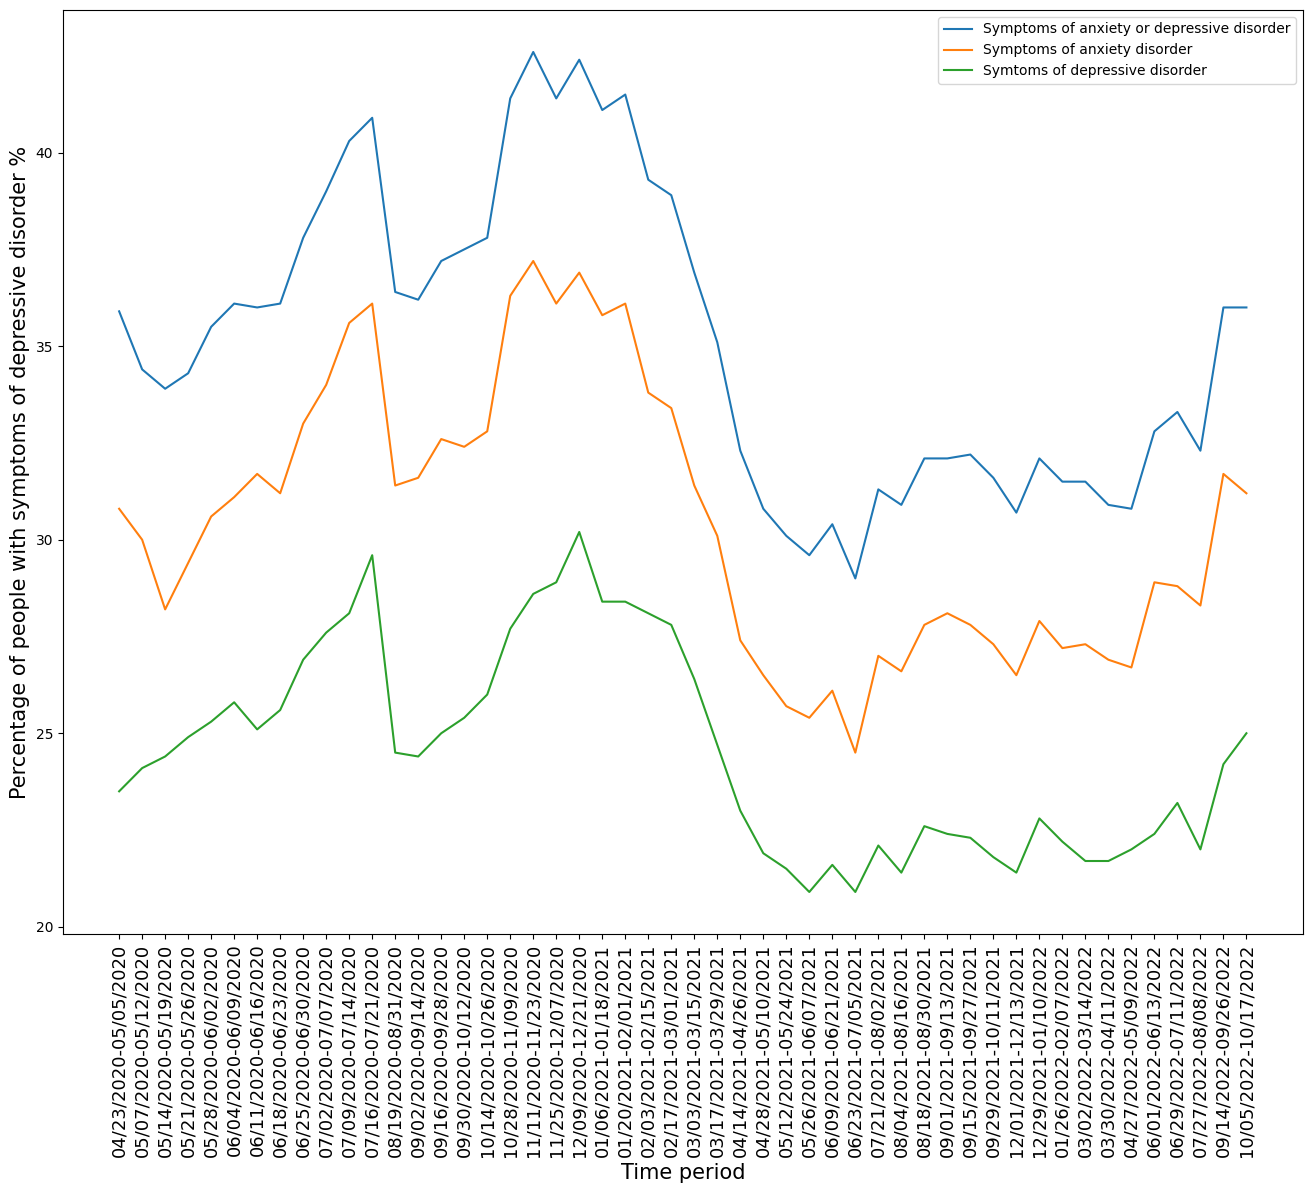

In [19]:
plt.figure(figsize=(16,12))
sns.lineplot(x=Time_period_dict.values(), y=pivot_anx_depr.iloc[-1,:], label='Symptoms of anxiety or depressive disorder')
sns.lineplot(x=Time_period_dict.values(), y=pivot_anx.iloc[-1,:], label='Symptoms of anxiety disorder')
sns.lineplot(x=Time_period_dict.values(), y=pivot_depr.iloc[-1,:], label='Symtoms of depressive disorder')
plt.legend()
plt.xticks(rotation='vertical', fontsize = 13)
plt.xlabel('Time period', fontsize = 15)
plt.ylabel('Percentage of people with symptoms of depressive disorder %', fontsize = 15)
plt.show()

We see that the 'symptoms of anxiety or depressive disorder' is not the addition of the 'symptoms of anxiety' and 'symptoms of depressive disorder'. This is because in the questionnaire they asked "do you have a) symptoms of anxiety and/or depressive dissorder, b) symptoms of anxiety disorder or c) symptoms of depressive disorder? There were three different options and the participants could only indicate one of them, this explains why the graphs don't add up.


Then we're plotting the symptoms by age group:

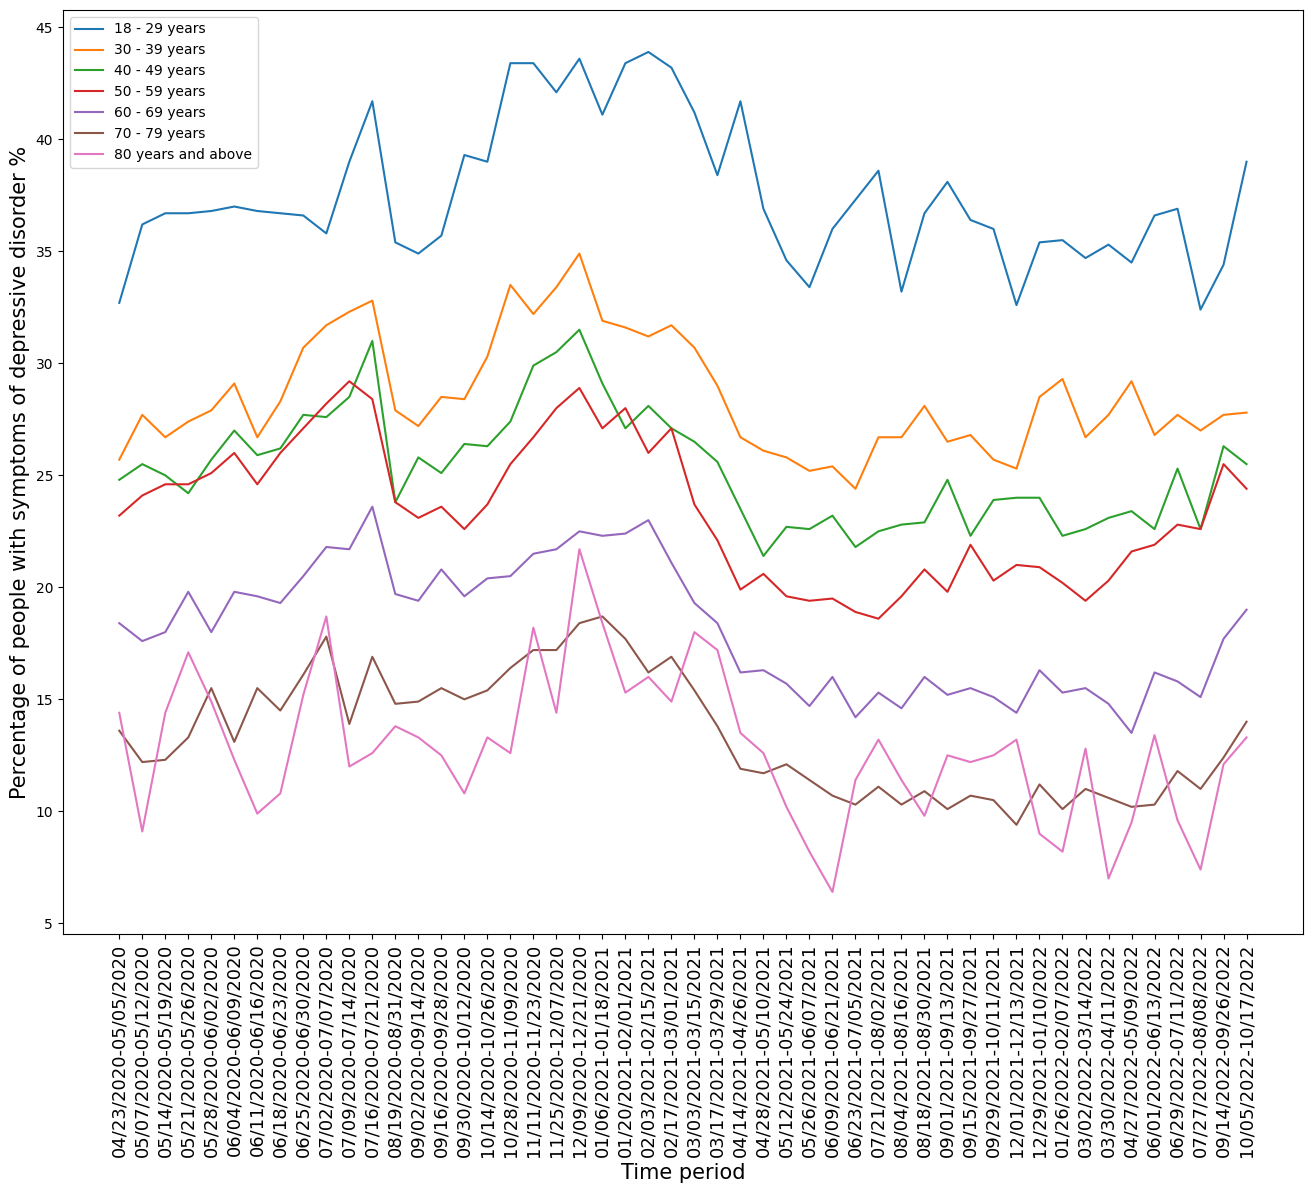

In [20]:
plt.figure(figsize=(16,12))
for i in range(0,7):
    sns.lineplot(x=Time_period_dict.values(), y=pivot_depr.iloc[i,:], label=pivot_depr.iloc[i].name[2])
    plt.legend()
plt.xticks(rotation='vertical', fontsize = 13)
plt.xlabel('Time period', fontsize = 15)
plt.ylabel('Percentage of people with symptoms of depressive disorder %', fontsize = 15)
plt.show()

Q: do we take the mean of all phases? Maybe we should weight it by lenght of time period!

We now plot the difference of pre- and during-covid times:

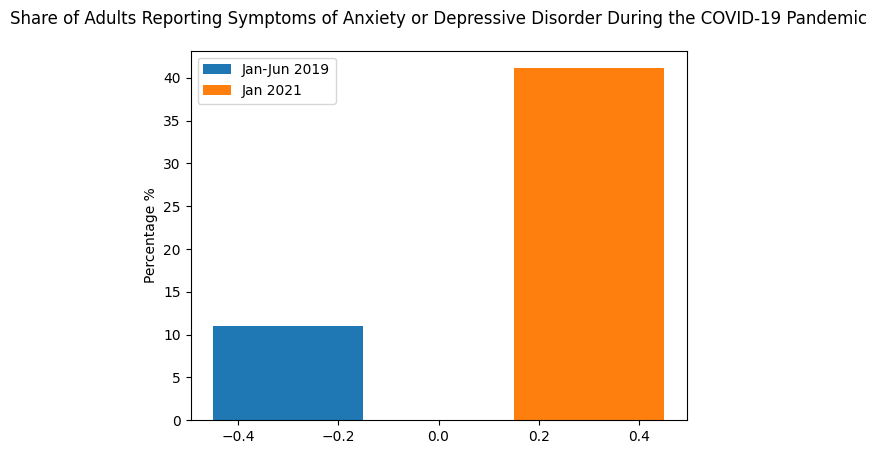

In [21]:
plt.bar(-0.3, height=11, width=0.3, label='Jan-Jun 2019')
plt.bar(0.3, height=41.1, width=0.3, label='Jan 2021')
plt.title('Share of Adults Reporting Symptoms of Anxiety or Depressive Disorder During the COVID-19 Pandemic', y=1.05)
plt.ylabel('Percentage %')
plt.legend()
plt.show()

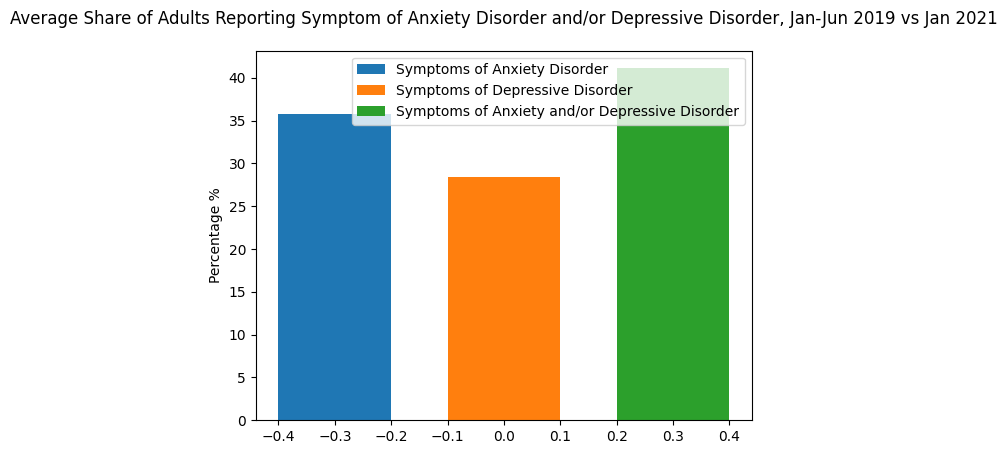

In [22]:
plt.bar(-0.3, height=35.8, width=0.2, label='Symptoms of Anxiety Disorder')
plt.bar(0, height=28.4, width=0.2, label='Symptoms of Depressive Disorder')
plt.bar(0.3, height=41.1, width=0.2, label='Symptoms of Anxiety and/or Depressive Disorder')
plt.title('Average Share of Adults Reporting Symptom of Anxiety Disorder and/or Depressive Disorder, Jan-Jun 2019 vs Jan 2021', y=1.05)
plt.ylabel('Percentage %')
plt.legend()
plt.show()

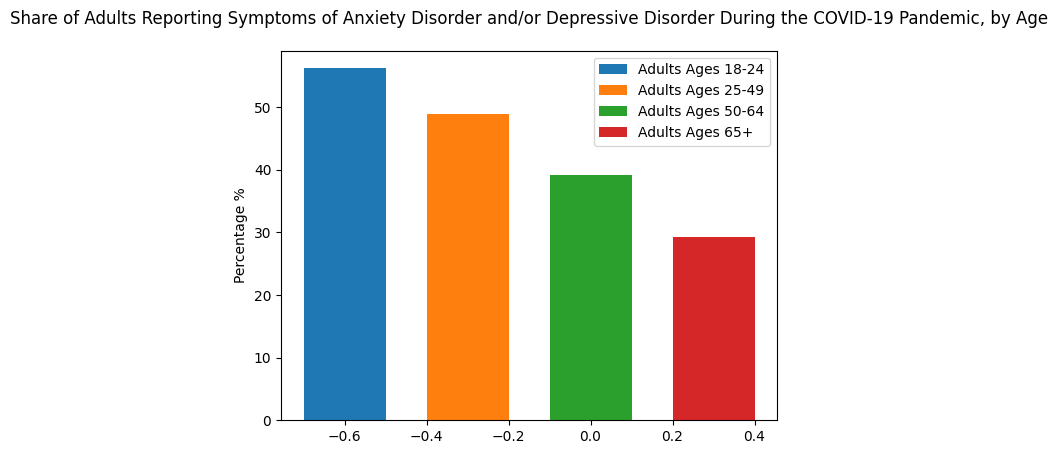

In [23]:
plt.bar(-0.6, height=56.2, width=0.2, label='Adults Ages 18-24')
plt.bar(-0.3, height=48.9, width=0.2, label='Adults Ages 25-49')
plt.bar(0, height=39.1, width=0.2, label='Adults Ages 50-64')
plt.bar(0.3, height=29.3, width=0.2, label='Adults Ages 65+')
plt.title('Share of Adults Reporting Symptoms of Anxiety Disorder and/or Depressive Disorder During the COVID-19 Pandemic, by Age', y=1.05)
plt.ylabel('Percentage %')
plt.legend()
plt.show()

BY ETHNICITY

### Principal Component Analysis

In [24]:
df_depr_bystate = df_depr[df_depr['Group'] == 'By State'].groupby('State').agg('mean')
df_depr_bystate.head(5)

/var/folders/j5/103k3xrj2mg6ylclm34ymgzm0000gn/T/ipykernel_84560/1348651791.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_depr_bystate = df_depr[df_depr['Group'] == 'By State'].groupby('State').agg('mean')


,Time Period,Value,Low CI,High CI
State,,,,
Alabama,25.5,26.658,21.846,31.924
Alaska,25.5,24.352,20.350,28.728
Arizona,25.5,25.692,21.944,29.722
Arkansas,25.5,27.284,22.594,32.390
California,25.5,26.138,23.406,29.026


In [25]:
df_standardized = (df_depr_bystate - np.mean(df_depr_bystate))/np.std(df_depr_bystate)
np.var(df_standardized)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Time Period    NaN
Value          1.0
Low CI         1.0
High CI        1.0
dtype: float64

In [26]:
df_standardized.dropna(inplace=True)
u, s, vt = np.linalg.svd(df_standardized, full_matrices = False)
u, s, vt

(array([], shape=(0, 0), dtype=float64),
 array([], dtype=float64),
 array([], shape=(0, 4), dtype=float64))

## Covid Health Insurance Coverage Dataset

### Exploratory Data Analysis

We start with making three seperate dataframes for each indicator.

In [27]:
print(df_insurance["Indicator"].unique())

['Uninsured at the Time of Interview' 'Public Health Insurance Coverage'
 'Private Health Insurance Coverage']


In [28]:
df_uninsured = df_insurance[df_insurance["Indicator"] == 'Uninsured at the Time of Interview']
df_public = df_insurance[df_insurance["Indicator"] == 'Public Health Insurance Coverage']
df_private = df_insurance[df_insurance["Indicator"] == 'Private Health Insurance Coverage']

In [29]:
pivot_uninsured = pd.pivot_table(df_uninsured, values='Value', index=['Group', 'State', 'Subgroup'], columns='Time Period')
pivot_uninsured

Time Period                                           1     2     3     4   \
Group                State         Subgroup                                  
By Age               United States 18 - 24 years    17.7  16.3  18.4  17.0   
                                   25 - 34 years    16.8  18.8  18.0  15.1   
                                   35 - 44 years    12.1  11.3  12.3  12.3   
                                   45 - 64 years     9.5   9.6  10.1   8.8   
By Disability status United States With disability   NaN   NaN   NaN   NaN   
...                                                  ...   ...   ...   ...   
By State             Washington    Washington        7.4   6.5   6.5   7.9   
                     West Virginia West Virginia    10.8  13.3  11.7  14.4   
                     Wisconsin     Wisconsin         9.3   NaN  10.6   5.6   
                     Wyoming       Wyoming          16.4  12.5  10.9  13.1   
National Estimate    United States United States    12.6  12.7  13.3  11.9   

Time Period                                           5     6     7     8   \
Group                State         Subgroup                                  
By Age               United States 18 - 24 years    18.2  18.1  15.7  15.3   
                                   25 - 34 years    17.6  17.5  16.9  17.0   
                                   35 - 44 years    13.8  13.9  14.8  14.4   
                                   45 - 64 years     9.4   9.2   9.9   9.0   
By Disability status United States With disability   NaN   NaN   NaN   NaN   
...                                                  ...   ...   ...   ...   
By State             Washington    Washington        9.8   9.0  10.2  10.1   
                     West Virginia West Virginia    11.9  17.9  11.3   7.4   
                     Wisconsin     Wisconsin         6.4   6.1  10.5   7.5   
                     Wyoming       Wyoming          22.0  19.0  16.3  11.0   
National Estimate    United States United States    13.2  13.0  13.2  12.8   

Time Period                                           9     10  ...    34  \
Group                State         Subgroup                     ...         
By Age               United States 18 - 24 years    19.0  19.7  ...  15.9   
                                   25 - 34 years    17.2  18.9  ...  15.3   
                                   35 - 44 years    15.2  14.5  ...  12.2   
                                   45 - 64 years     9.3   9.8  ...   8.1   
By Disability status United States With disability   NaN   NaN  ...  14.6   
...                                                  ...   ...  ...   ...   
By State             Washington    Washington        9.2   9.2  ...   8.9   
                     West Virginia West Virginia    12.7  12.1  ...   NaN   
                     Wisconsin     Wisconsin         7.4   8.5  ...   7.4   
                     Wyoming       Wyoming          20.8  17.9  ...  15.3   
National Estimate    United States United States    13.5  14.0  ...  11.4   

Time Period                                           35    36    37    38  \
Group                State         Subgroup                                  
By Age               United States 18 - 24 years    12.2  13.9  16.9  14.0   
                                   25 - 34 years    15.3  13.9  15.9  12.6   
                                   35 - 44 years    11.2  11.5  11.0  11.0   
                                   45 - 64 years     8.0   7.7   7.8   7.9   
By Disability status United States With disability  13.8  13.6  12.9  14.2   
...                                                  ...   ...   ...   ...   
By State             Washington    Washington        6.6   7.6   8.8   7.6   
                     West Virginia West Virginia    13.8   8.9   NaN   7.3   
                     Wisconsin     Wisconsin         5.9   4.4   5.0   4.9   
                     Wyoming       Wyoming          10.1  21.3  12.8  17.4   
National Estimate    United Stat

In [30]:
pivot_public = pd.pivot_table(df_public, values='Value', index=['Group', 'State', 'Subgroup'], columns='Time Period')
pivot_private = pd.pivot_table(df_private, values='Value', index=['Group', 'State', 'Subgroup'], columns='Time Period')
pivot_public 
pivot_private

Time Period                                           1     2     3     4   \
Group                State         Subgroup                                  
By Age               United States 18 - 24 years    70.9  68.4  72.5  72.1   
                                   25 - 34 years    69.6  66.8  66.7  73.0   
                                   35 - 44 years    75.7  76.2  75.0  76.1   
                                   45 - 64 years    79.7  77.7  77.7  80.5   
By Disability status United States With disability   NaN   NaN   NaN   NaN   
...                                                  ...   ...   ...   ...   
By State             Washington    Washington       80.9  81.4  84.8  83.9   
                     West Virginia West Virginia    70.9  70.0  62.0  63.3   
                     Wisconsin     Wisconsin        79.5  74.6  76.0  86.8   
                     Wyoming       Wyoming          79.4  81.2  80.6  78.7   
National Estimate    United States United States    75.4  74.1  73.9  76.9   

Time Period                                           5     6     7     8   \
Group                State         Subgroup                                  
By Age               United States 18 - 24 years    72.2  72.6  73.5  73.2   
                                   25 - 34 years    69.1  69.3  69.1  69.4   
                                   35 - 44 years    73.4  73.7  73.0  72.0   
                                   45 - 64 years    79.5  78.4  78.1  78.9   
By Disability status United States With disability   NaN   NaN   NaN   NaN   
...                                                  ...   ...   ...   ...   
By State             Washington    Washington       80.0  79.3  75.9  76.9   
                     West Virginia West Virginia    74.1  58.9  64.6  68.5   
                     Wisconsin     Wisconsin        82.7  81.3  78.2  80.5   
                     Wyoming       Wyoming          69.5  72.6  73.7  79.3   
National Estimate    United States United States    75.0  74.6  74.4  74.5   

Time Period                                           9     10  ...    34  \
Group                State         Subgroup                     ...         
By Age               United States 18 - 24 years    72.1  72.0  ...  74.5   
                                   25 - 34 years    70.1  68.3  ...  70.9   
                                   35 - 44 years    71.4  72.5  ...  74.9   
                                   45 - 64 years    76.8  76.4  ...  79.3   
By Disability status United States With disability   NaN   NaN  ...  58.5   
...                                                  ...   ...  ...   ...   
By State             Washington    Washington       76.0  76.8  ...  78.5   
                     West Virginia West Virginia    59.8  65.1  ...  63.5   
                     Wisconsin     Wisconsin        82.4  79.7  ...  81.7   
                     Wyoming       Wyoming          72.3  67.3  ...  79.4   
National Estimate    United States United States    73.5  73.2  ...  76.0   

Time Period                                           35    36    37    38  \
Group                State         Subgroup                                  
By Age               United States 18 - 24 years    77.8  76.2  71.8  76.8   
                                   25 - 34 years    72.2  72.7  71.3  73.2   
                                   35 - 44 years    77.2  75.7  75.8  76.6   
                                   45 - 64 years    79.5  79.8  79.8  79.7   
By Disability status United States With disability  60.9  59.3  58.8  59.9   
...                                                  ...   ...   ...   ...   
By State             Washington    Washington       82.4  82.1  77.4  79.4   
                     West Virginia West Virginia    66.7  75.9  73.6  71.9   
                     Wisconsin     Wisconsin        83.7  83.2  85.5  80.0   
                     Wyoming       Wyoming          85.1  75.3  81.5  78.9   
National Estimate    United Stat

In [31]:
plt.figure(figsize=(16,12))
sns.lineplot(x=Time_period_dict.values(), y=pivot_uninsured.iloc[-1,:], label='Uninsured')
sns.lineplot(x=Time_period_dict.values(), y=pivot_public.iloc[-1,:], label='Public')
sns.lineplot(x=Time_period_dict.values(), y=pivot_private.iloc[-1,:], label='Private')
plt.legend()
plt.xticks(rotation='vertical', fontsize = 13)
plt.xlabel('Time period', fontsize = 15)
plt.ylabel('Percentage of people with insurance %', fontsize = 15)
plt.show()

ValueError: array length 50 does not match index length 43

<Figure size 1600x1200 with 0 Axes>

In [34]:
def pivot_tables(dataset):
    unique_indicators = dataset.Indicator.unique()
    L_pivot_data = []
    for indicator in unique_indicators:
        pivoted = pd.pivot_table(dataset[dataset.Indicator==indicator], values='Value', index=['Indicator', 'Group', 'State', 'Subgroup'], columns=['Time Period'])
        L_pivot_data.append(pivoted)
    return L_pivot_data
data_pivots = pivot_tables(df_symptoms_anx_depr)


We build a pipeline to build our model. We do this by looping over the indicators and we clean the data by replacing the phase column by '3.02' 

In [35]:
def pipeline(origin):
    L_dfs = []
    unique_indicators = origin.Indicator.unique()
    for ind in unique_indicators:
        data = origin[origin['Indicator'] == ind]
        dict_phases = {}
        collective_df = pd.DataFrame()

        Subgroups_unique = data.Subgroup.unique()
        data['Phase'].replace(r'.*\d\s.*O.*', '3.02', regex=True, inplace=True)
        data['Phase'].replace(r'.*\d\s.*J.*', '3.05', regex=True, inplace=True)
        unique_phases = data.Phase.unique()
        time_phase = data[(data.Subgroup == Subgroups_unique[0]) & (data.Phase!= '-1')]
        for phase in unique_phases:
            L = []
            for i in range(len(time_phase)):
                if time_phase.Phase.values[i] == phase:
                    L.append(time_phase['Time Period'].values[i])
            dict_phases[phase] = L
        for subgroup in Subgroups_unique:
            s = pd.DataFrame(data[data.Subgroup==subgroup].groupby('Phase')['Value'].mean())
            s['Subgroup'] = subgroup
            collective_df = pd.concat([collective_df, s], axis=0 )
            
        collective_df.rename(columns={'Value' : ind}, inplace=True)   
        collective_df.dropna(inplace=True)
        collective_df.reset_index(inplace=True)
        L_dfs.append(collective_df)
        
    return L_dfs, unique_indicators

In [36]:
dfss, indicators = pipeline(df_symptoms_anx_depr)

/var/folders/j5/103k3xrj2mg6ylclm34ymgzm0000gn/T/ipykernel_84560/1164545383.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Phase'].replace(r'.*\d\s.*O.*', '3.02', regex=True, inplace=True)
/var/folders/j5/103k3xrj2mg6ylclm34ymgzm0000gn/T/ipykernel_84560/1164545383.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Phase'].replace(r'.*\d\s.*J.*', '3.05', regex=True, inplace=True)
/var/folders/j5/103k3xrj2mg6ylclm34ymgzm0000gn/T/ipykernel_84560/1164545383.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

We write a function to do one-hot-encoding on the dataset, in order to do the inference on categorial values. This function returns new dataframes with one hot encoded columns.

[TODO] look at the ohe function of the homework solution and try to avoid for loops 

In [37]:
def ohe(dataframes):
    L_ohe_dfs = []
    for data in dataframes:
        data.reset_index(inplace=True)
        data.drop(columns='index', inplace=True)
        m = len(data.Phase.unique())
        n = len(data)
        arr = np.zeros([n,m])
        for i in range(m):
            for j in range(n):
                if data.Phase.values[j] == data.Phase.unique()[i]:
                    arr[j,i] = 1
        nn = pd.DataFrame(arr, columns=data.Phase.unique())
        ohe = pd.concat([data, nn], axis=1)
        L_ohe_dfs.append(ohe)
    return L_ohe_dfs

[Q] What is this??

In [39]:
L_dfs_Depr[0]

NameError: name 'L_dfs_Depr' is not defined

The following function plots the correlation between data. First, the two datasets are mergedd on their "Phase" and "Subgroups" columns. Then we make scatterplot of the correlation between all features.

In [40]:
def plot_corr(data_1, unique_1, data_2, unique_2, verbose=False):
    m = len(data_1)
    n = len(data_2)
    plt.subplots(nrows=m, ncols=n, figsize=(30,20))   
    
    merged_dfs = []

    t = 0
    for i in range(m):
        for j in range(n):
            t+=1
            merged = pd.merge(data_1[i], data_2[j], on=['Phase', 'Subgroup'], how='left')
            merged.dropna(inplace=True)
            merged.rename(columns={'Value_x' : unique_1[i], 'Value_y' :unique_2[j]}, inplace=True)
            
            #move label column to first position
            col = merged.pop(unique_1[i])
            merged.insert(0, col.name, col)
            
            plt.subplot(m,n, t)
            plt.scatter(x=merged[unique_1[i]], y=merged[unique_2[j]])
            plt.title(f'{unique_1[i]} vs {unique_2[j]}')
            plt.xlabel(f'{unique_1[i]}')
            plt.ylabel(f'{unique_2[j]}')
            
            merged_dfs.append(merged)
    return merged_dfs

We now plot the correlation between the health insurance and symptoms of anxiety and depressive disorder datasets, to find out whether there is a relation between them.

In [44]:
L_dfs_HS, unique_indicators_HS = pipeline(df_insurance)
L_dfs_Depr, unique_indicators_Depr = pipeline(df_symptoms_anx_depr)
L_dfs_HC, unique_indicators_HC = pipeline(df_healthcare)
L_dfs_access, unique_indicators_access = pipeline(df_access)
L_dfs_tele, unique_indicators_tele = pipeline(df_tele)

/var/folders/j5/103k3xrj2mg6ylclm34ymgzm0000gn/T/ipykernel_84560/1164545383.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Phase'].replace(r'.*\d\s.*O.*', '3.02', regex=True, inplace=True)
/var/folders/j5/103k3xrj2mg6ylclm34ymgzm0000gn/T/ipykernel_84560/1164545383.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Phase'].replace(r'.*\d\s.*J.*', '3.05', regex=True, inplace=True)
/var/folders/j5/103k3xrj2mg6ylclm34ymgzm0000gn/T/ipykernel_84560/1164545383.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

/var/folders/j5/103k3xrj2mg6ylclm34ymgzm0000gn/T/ipykernel_84560/1164545383.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Phase'].replace(r'.*\d\s.*O.*', '3.02', regex=True, inplace=True)
/var/folders/j5/103k3xrj2mg6ylclm34ymgzm0000gn/T/ipykernel_84560/1164545383.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Phase'].replace(r'.*\d\s.*J.*', '3.05', regex=True, inplace=True)
/var/folders/j5/103k3xrj2mg6ylclm34ymgzm0000gn/T/ipykernel_84560/1164545383.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

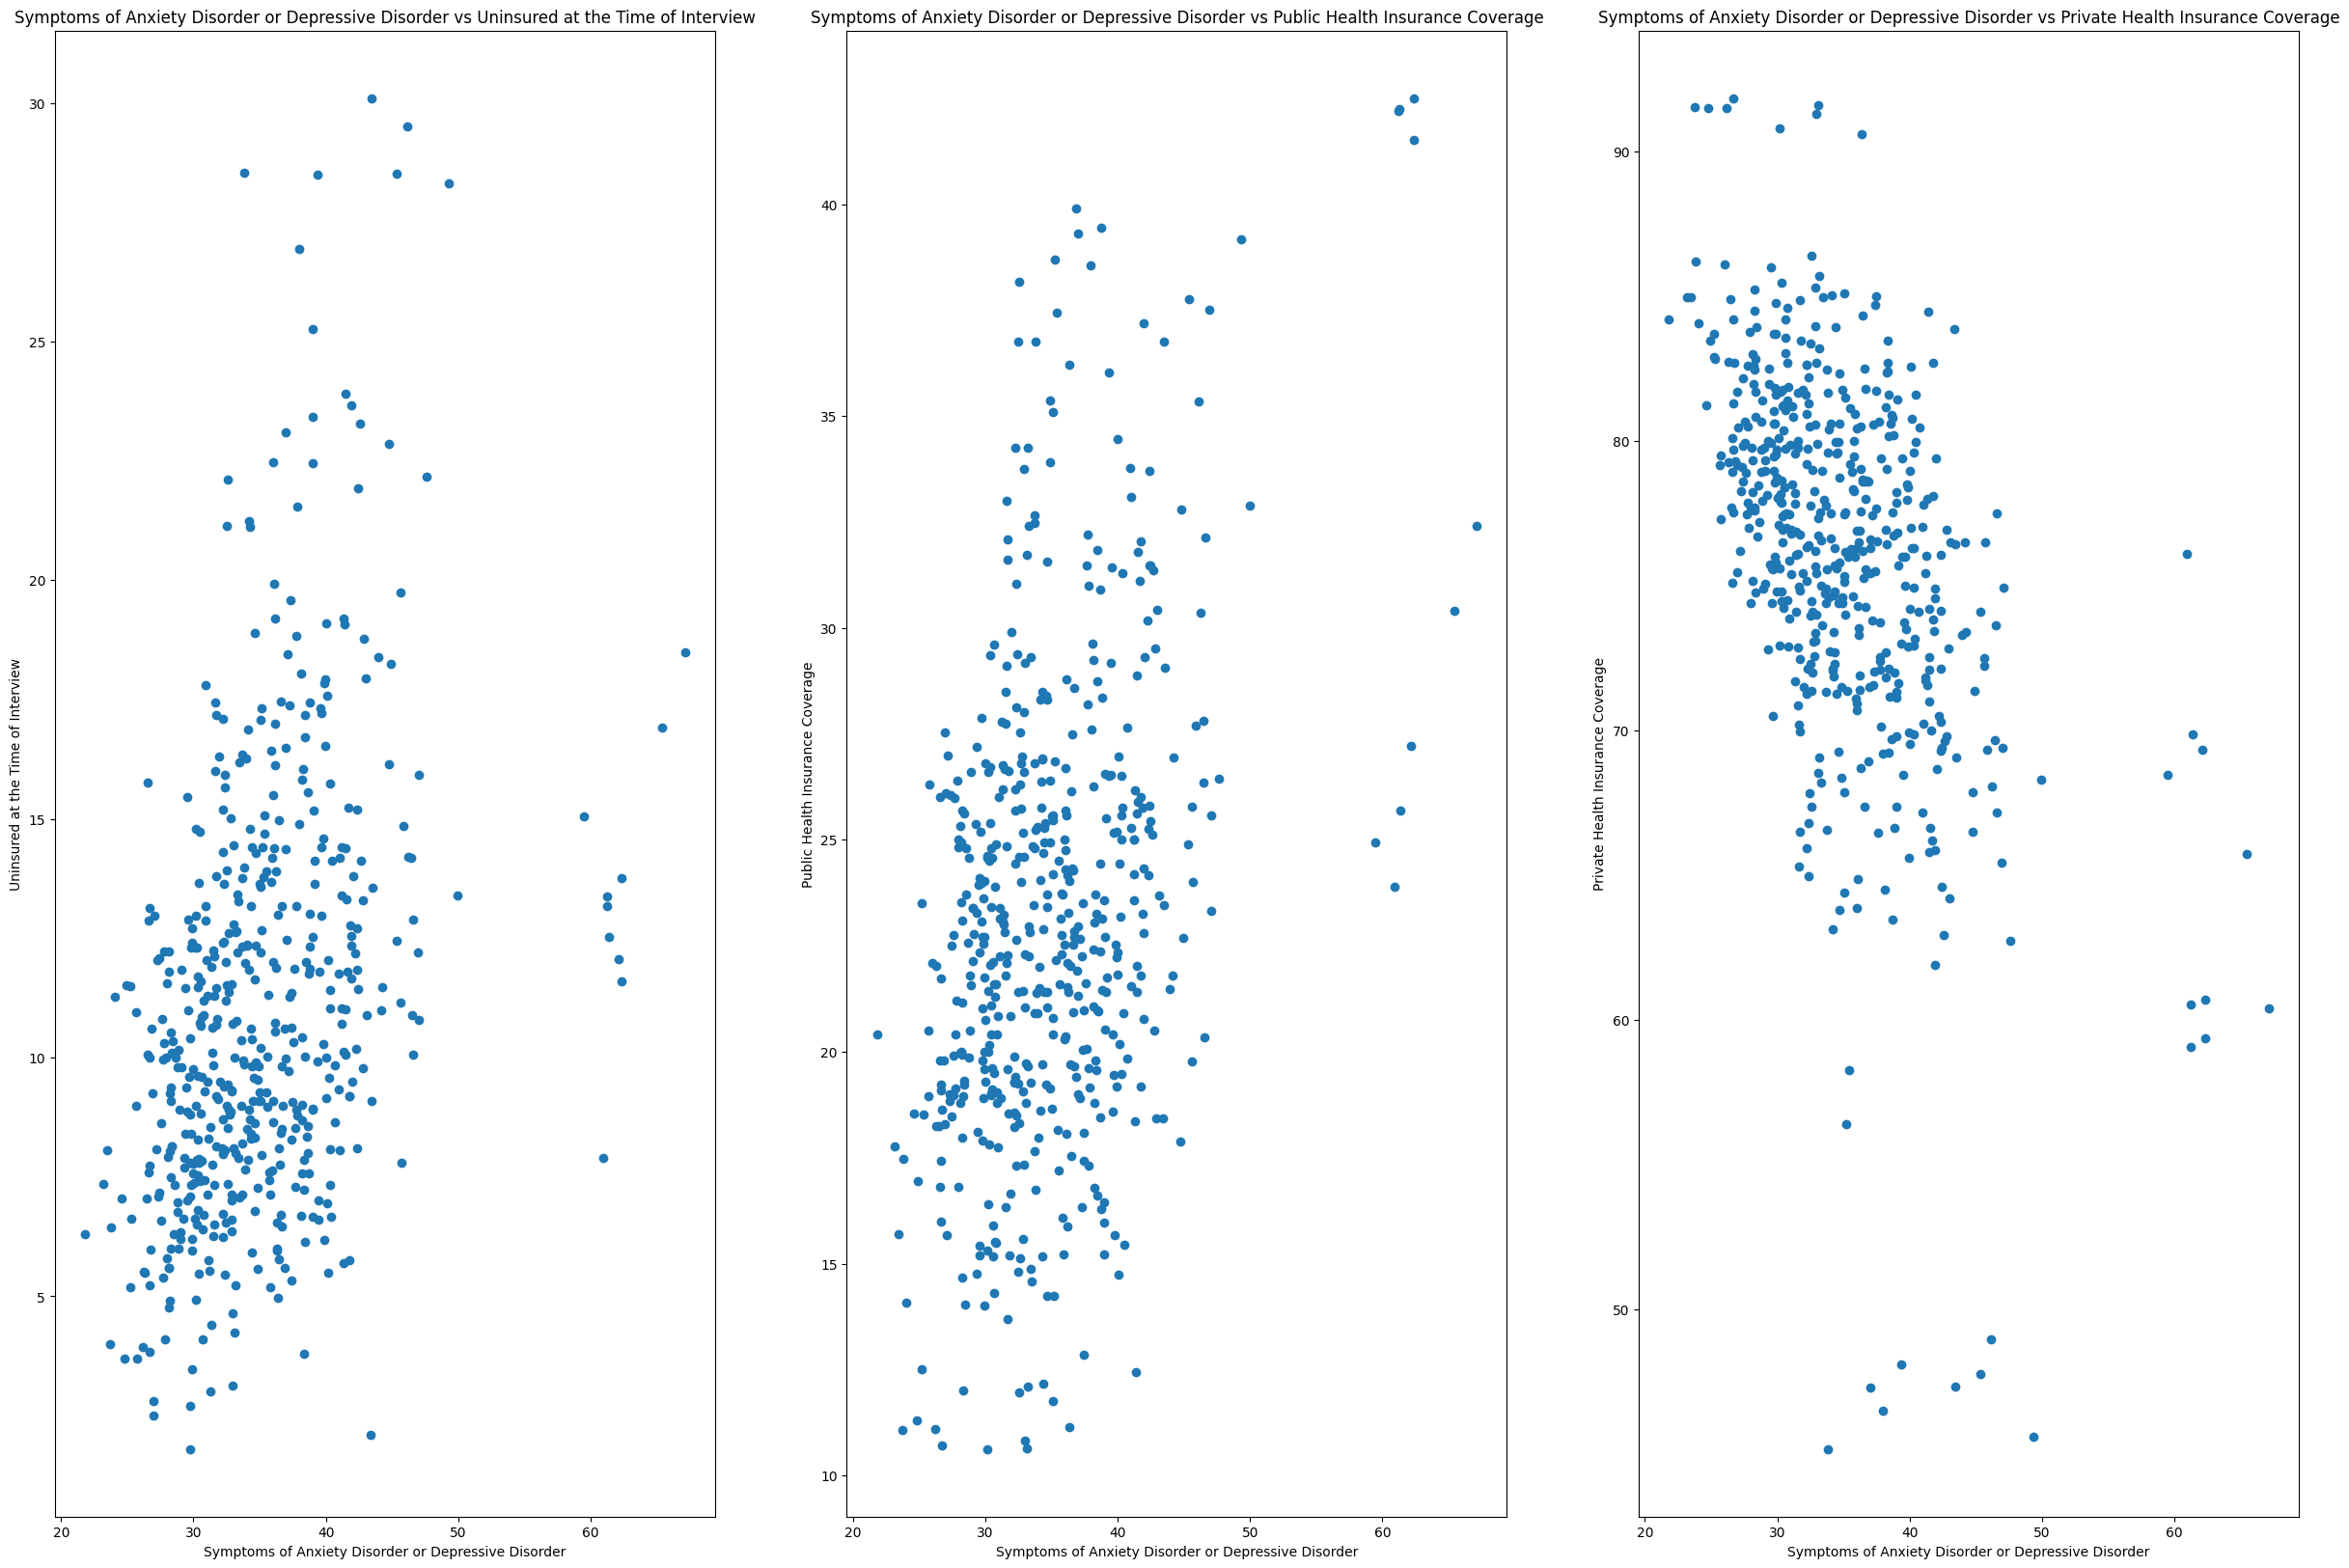

In [42]:
merged_dfs = plot_corr(pipeline(df_anx_depr)[0], pipeline(df_anx_depr)[1],
                       pipeline(df_insurance)[0], pipeline(df_insurance)[1])

There seems to be a correlation between the datasetss, we investigate further.

[TODO]

In [43]:
ohe_df_final = ohe(merged_dfs)

Now we plot the correlation between access to healthcare and symptoms of anxiety and depression.